In [1]:
import numpy as np
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from math import sqrt

Using TensorFlow backend.
c:\users\dorotka\anaconda3\envs\dataanalitics\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\dorotka\anaconda3\envs\dataanalitics\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\dorotka\anaconda3\envs\dataanalitics\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\dorotka\

In [2]:
import matplotlib.pyplot as plt

def show_y_pred_test(y_pred_df, y_test_df, n=3,size = 100, station_name = ""):
    plt.figure()
    plt.plot(y_pred_df['PM10_Forecast_{}h'.format(n)][:size])
    plt.plot(y_test_df.reset_index()['PM10_Forecast_{}h'.format(n)][:size] )
    plt.title("Forecast {}h {}".format(n, station_name))
    plt.ylabel('PM10')
    plt.xlabel('index')
    plt.legend(['y_predicted', 'y_original'], loc='upper left')
    return plt

# Dane

In [3]:
data = pd.read_csv("./data_preprocessed/2017-2018_single_MpKrakAlKras_with_forecast3_8_12h_cleared.csv")

data.head(5)

,timestamp,MpKrakAlKras-PM10-1g,Weather,Temp(C),Wind(m/s),Direction(deg),Humidity,Barometer(mbar),PM10_Forecast_3h,PM10_Forecast_8h,PM10_Forecast_12h
0,2017-01-01 01:00:00,213.733,Ice fog.,-6.0,1.0,0.0,0.93,10.24,244.690,187.320,121.805
1,2017-01-01 02:00:00,213.868,Ice fog.,-7.0,2.0,190.0,0.93,10.24,224.673,181.194,119.096
2,2017-01-01 03:00:00,221.923,Ice fog.,-4.0,3.0,200.0,0.80,10.23,212.159,161.198,121.681
3,2017-01-01 04:00:00,244.690,Ice fog.,-7.0,3.0,210.0,0.86,10.22,198.375,136.218,138.353
4,2017-01-01 05:00:00,224.673,Ice fog.,-6.0,3.0,200.0,0.80,10.22,191.881,121.805,150.415


In [4]:
X = data[["MpKrakAlKras-PM10-1g","Direction(deg)","Temp(C)","Wind(m/s)","Humidity","Barometer(mbar)"]]

y = data[["PM10_Forecast_3h","PM10_Forecast_8h","PM10_Forecast_12h"]]

In [5]:
scaler = StandardScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scale.head()

,MpKrakAlKras-PM10-1g,Direction(deg),Temp(C),Wind(m/s),Humidity,Barometer(mbar)
0,3.406057,-1.229537,-1.641839,-1.06963,0.922469,1.009585
1,3.408971,0.461359,-1.747499,-0.62705,0.922469,1.009585
2,3.582857,0.550354,-1.430521,-0.18447,0.165148,0.881591
3,4.074335,0.639348,-1.747499,-0.18447,0.514681,0.753597
4,3.642222,0.550354,-1.641839,-0.18447,0.165148,0.753597


In [6]:
#weather_id trzeba by dodać jako one-hot a nie słownik, tylko że wtedy mamy 100 dodatkowych kolumn

train_X, test_X, train_y, test_y = train_test_split(X_scale.values, y, test_size=0.1,
                                                    random_state=0)

In [8]:
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Model

In [9]:
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=6, activation='sigmoid'))
    model.add(Dense(8, activation='sigmoid'))
    model.add(Dense(3, activation='linear'))

    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam' , metrics=['mse', 'mae'])
    return model

# evaluate model
# estimator_kras = KerasRegressor(build_fn=create_model, epochs=50, batch_size=20, verbose=0)

In [11]:
model_kras = create_model()
history = model_kras.fit(train_X, train_y, epochs=50, batch_size=20, verbose = 0)

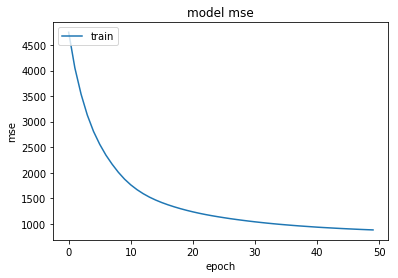

In [12]:
hist_k = 'mse'
plt.plot(history.history[hist_k])
plt.title("model {}".format(hist_k))
plt.ylabel(hist_k)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
y_pred = model_kras.predict(test_X)
rms = sqrt(mean_squared_error(test_y, y_pred))
rms

30.70509190327993

In [15]:
now = np.array([[20,210,-8,3,0.8 ,10]])
n=scaler.transform(now)

pred = model_kras.predict(n)
pred
#def predict(condtions):
#    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=96)
#    score = model.predict([x_test])[0]

array([[50.10147 , 50.24385 , 50.398094]], dtype=float32)

### Podsumowanie

In [16]:
_, X_test_orig, _, y_test_orig = train_test_split(X, y, test_size=0.1,
                                                    random_state=0)

y_test_orig = y_test_orig.sort_index()
X_test_orig = X_test_orig.sort_index()

X_test_scaler = pd.DataFrame(scaler.transform(X_test_orig),columns=X_test_orig.columns)

y_pred = model_kras.predict(X_test_scaler.values)
y_pred_df = pd.DataFrame(y_pred,columns=y_test_orig.columns)
y_pred_df.head()

,PM10_Forecast_3h,PM10_Forecast_8h,PM10_Forecast_12h
0,167.763626,155.043396,149.848816
1,122.445641,115.268974,112.402802
2,140.860703,131.018433,127.173393
3,168.330002,155.552338,150.330750
4,74.619141,72.362152,71.603310


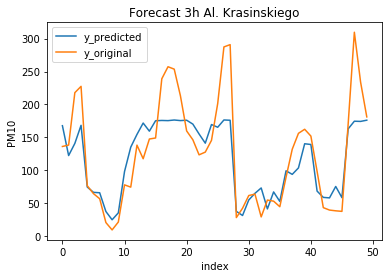

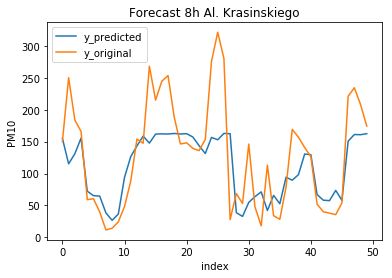

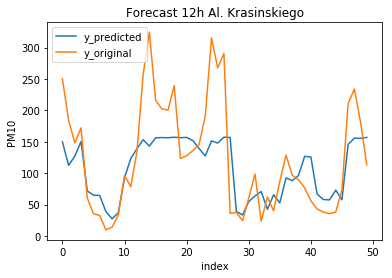

In [17]:
for n in (3, 8, 12):
    show_y_pred_test(y_pred_df, y_test_orig, n=n, size=50, station_name="Al. Krasinskiego")

# To samo dla ul Bujaka

In [18]:
data = pd.read_csv("./data_preprocessed/2017-2018_single_MpKrakBujaka_with_forecast3_8_12h_cleared.csv")

data.head(5)

,timestamp,MpKrakBujaka-PM10-1g,Weather,Temp(C),Wind(m/s),Direction(deg),Humidity,Barometer(mbar),PM10_Forecast_3h,PM10_Forecast_8h,PM10_Forecast_12h
0,2017-01-01 01:00:00,392.428,Ice fog.,-6.0,1.0,0.0,0.93,10.24,191.820,153.0490,81.3565
1,2017-01-01 02:00:00,258.667,Ice fog.,-7.0,2.0,190.0,0.93,10.24,187.663,127.6300,68.4491
2,2017-01-01 03:00:00,211.760,Ice fog.,-4.0,3.0,200.0,0.80,10.23,183.347,119.8900,83.1521
3,2017-01-01 04:00:00,191.820,Ice fog.,-7.0,3.0,210.0,0.86,10.22,153.062,108.1610,114.0370
4,2017-01-01 05:00:00,187.663,Ice fog.,-6.0,3.0,200.0,0.80,10.22,148.309,81.3565,154.2260


In [19]:
X = data[["MpKrakBujaka-PM10-1g","Direction(deg)","Temp(C)","Wind(m/s)","Humidity","Barometer(mbar)"]]

y = data[["PM10_Forecast_3h","PM10_Forecast_8h","PM10_Forecast_12h"]]

In [20]:
scaler = StandardScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scale.head()

,MpKrakBujaka-PM10-1g,Direction(deg),Temp(C),Wind(m/s),Humidity,Barometer(mbar)
0,7.769326,-1.225402,-1.614220,-1.089081,0.939750,1.009646
1,4.791464,0.468566,-1.718042,-0.640536,0.939750,1.009646
2,3.747194,0.557722,-1.406576,-0.191990,0.184622,0.881477
3,3.303279,0.646878,-1.718042,-0.191990,0.533143,0.753308
4,3.210733,0.557722,-1.614220,-0.191990,0.184622,0.753308


In [21]:
train_X, test_X, train_y, test_y = train_test_split(X_pca, y, test_size=0.1,
                                                    random_state=0)

NameError: name 'X_pca' is not defined

In [22]:
model_bujaka = create_model()
history = model_bujaka.fit(train_X, train_y, epochs=50, batch_size=20, verbose = 0)

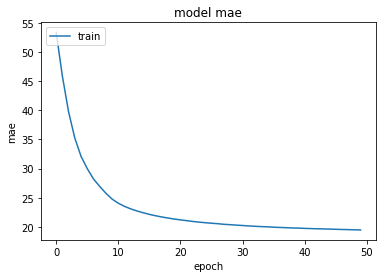

In [23]:
hist_k = 'mae'
plt.plot(history.history[hist_k])
plt.title("model {}".format(hist_k))
plt.ylabel(hist_k)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
y_pred = model_bujaka.predict(test_X)
rms = sqrt(mean_squared_error(test_y, y_pred))
rms

30.781882493856493

### Podsumowanie:

In [25]:
_, X_test_orig, _, y_test_orig = train_test_split(X, y, test_size=0.1,
                                                    random_state=0)

y_test_orig = y_test_orig.sort_index()
X_test_orig = X_test_orig.sort_index()

X_test_scaler = pd.DataFrame(scaler.transform(X_test_orig),columns=X_test_orig.columns)

y_pred = model_bujaka.predict(X_test_scaler.values)
y_pred_df = pd.DataFrame(y_pred,columns=y_test_orig.columns)
y_pred_df.head()

,PM10_Forecast_3h,PM10_Forecast_8h,PM10_Forecast_12h
0,159.780762,147.386002,143.435989
1,102.362206,97.237747,95.365158
2,156.121765,144.184967,140.379898
3,173.597061,159.583069,155.249252
4,82.463638,79.647018,78.368774


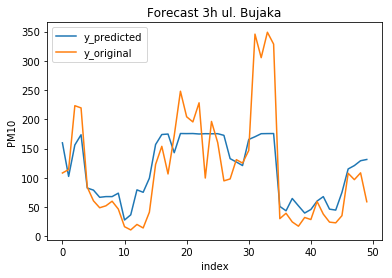

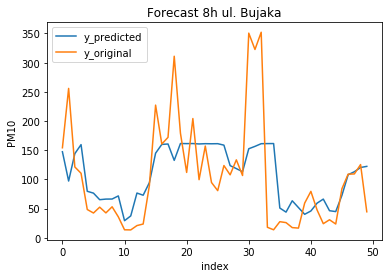

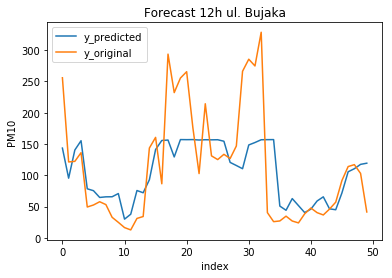

In [26]:
for n in (3, 8, 12):
    show_y_pred_test(y_pred_df, y_test_orig, n=n, size=50, station_name="ul. Bujaka")